Obervations and Insights: The Power of Plots
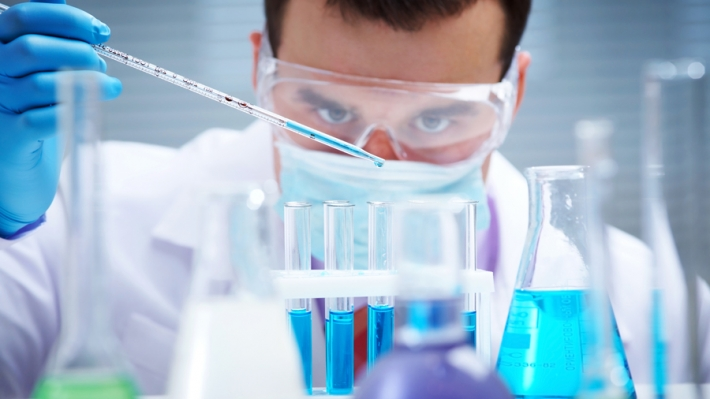

Observations and Inferences based on the data provided below.
1) The study is evenly distributed by Sex of Mice and by number of Mice on each Regimen.
2) Capomulin and Ramincane appear to be the best Regimens tested, as they have the lowest ending (by Time Count) Tumor Volume Median in the study.  These results are also within an acceptable range without outliers.
3) For the Drug Capomulin, there appears to be a strong relationship between Average Tumor Volume and Mouse Weight.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
#Bring in csv files and put them into dataframes
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)


In [3]:
#Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata_df,study_results_df, on="Mouse ID")
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
#Get Unique number of Mouse by Mouse ID
uniquemouse = merged_df['Mouse ID'].nunique()
print(uniquemouse)

249


In [5]:
#Maximum Timecount is 10 per Mouse ID.  If Mouse ID has greater than 10, delete.
mousetp_count = merged_df[["Mouse ID","Timepoint"]].groupby(['Mouse ID']).agg(['count'])
mousetp_count

,Timepoint
,count
Mouse ID,
a203,10
a251,10
a262,10
a275,10
a366,7
...,...
z435,3
z578,10


In [6]:
#Merge Total Time Count into dataframe to exclude TimeCounts > 10
cleanmerged_df = pd.merge(merged_df,mousetp_count, on="Mouse ID")
cleanmerged_df
cleanmerged_df.rename(columns={cleanmerged_df.columns[8]: "sumtimecount"}, inplace = True)
cleanmerged_df

C:\Users\rjp54\anaconda3\envs\PythonData\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,sumtimecount
0,k403,Ramicane,Male,21,16,0,45.000000,0,10
1,k403,Ramicane,Male,21,16,5,38.825898,0,10
2,k403,Ramicane,Male,21,16,10,35.014271,1,10
3,k403,Ramicane,Male,21,16,15,34.223992,1,10
4,k403,Ramicane,Male,21,16,20,32.997729,1,10
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,10
1889,z969,Naftisol,Male,9,30,30,65.841013,3,10
1890,z969,Naftisol,Male,9,30,35,69.176246,4,10
1891,z969,Naftisol,Male,9,30,40,70.314904,4,10


In [7]:
#Delete all Mouse ID entries with total timepoints > 10 "G989" has 13
cleanmerged_df=cleanmerged_df[cleanmerged_df['sumtimecount'] < 11]
cleanmerged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,sumtimecount
0,k403,Ramicane,Male,21,16,0,45.000000,0,10
1,k403,Ramicane,Male,21,16,5,38.825898,0,10
2,k403,Ramicane,Male,21,16,10,35.014271,1,10
3,k403,Ramicane,Male,21,16,15,34.223992,1,10
4,k403,Ramicane,Male,21,16,20,32.997729,1,10
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,10
1889,z969,Naftisol,Male,9,30,30,65.841013,3,10
1890,z969,Naftisol,Male,9,30,35,69.176246,4,10
1891,z969,Naftisol,Male,9,30,40,70.314904,4,10


In [8]:
#Generate Summary Statistics table of the Tumor Volume for each drug regimen
#Set up calculations Mean, Median, Variance, Standard Deviation, and SEM
meantumorvol = cleanmerged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
mediantumorvol = cleanmerged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variancetumorvol = cleanmerged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdevtumorvol = cleanmerged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
semtumorvol = cleanmerged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
#Put Summary statistics into DataFrame
tumorvoldrug_df = pd.DataFrame({"Mean": meantumorvol, "Median": mediantumorvol, "Variance": variancetumorvol, "St Dev": stdevtumorvol, "SEM": semtumorvol})
tumorvoldrug_df

,Mean,Median,Variance,St Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
#Generate Bar Plot by DataFrame.plot() Total Mice fore each treatment regimen
#Need the unique number of Mice IDs per regimen
mouseperdrug = cleanmerged_df.drop_duplicates(subset =['Mouse ID'])
mouseperdrug.sort_values(by=['Drug Regimen', 'Mouse ID'])
mouseperdrug

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,sumtimecount
0,k403,Ramicane,Male,21,16,0,45.0,0,10
10,s185,Capomulin,Female,3,17,0,45.0,0,10
20,x401,Capomulin,Female,16,15,0,45.0,0,10
30,m601,Capomulin,Male,22,17,0,45.0,0,10
40,g791,Ramicane,Male,11,16,0,45.0,0,10
...,...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0,2
1860,z435,Propriva,Female,12,26,0,45.0,0,3
1863,z581,Infubinol,Female,24,25,0,45.0,0,10
1873,z795,Naftisol,Female,13,29,0,45.0,0,10


In [10]:
#Create bar plot of Total Mice per Drug Regimen using DataFrame.plot and pyplot
#drugregimen = mouseperdrug.groupby('Drug Regimen')
#Moving up to prior dataframe to include all mouse instances.
micedrug = cleanmerged_df['Drug Regimen'].value_counts()
micedrug

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

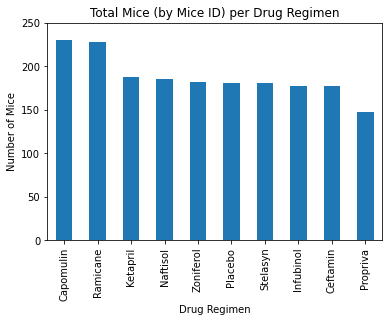

In [11]:
#Create Total Mice per Drug Regimen Chart using Matplotlib pyplot
miceperdrug_chart = micedrug.plot(kind='bar')
miceperdrug_chart.set_xlabel("Drug Regimen")
miceperdrug_chart.set_ylabel("Number of Mice")
miceperdrug_chart.set_title("Total Mice (by Mice ID) per Drug Regimen")
plt.ylim((0,250))
plt.show()

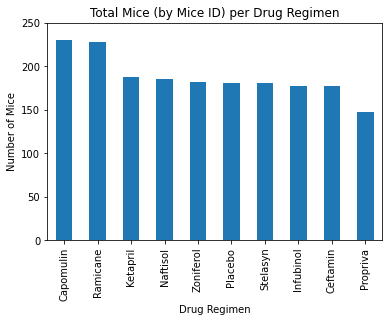

In [12]:
#Create Total Mice per Drug Regimen Chart using DataFrame plot
ttlmice = micedrug.plot.bar(x='Drug Regimen', y='micedrug', rot=0, title='Total Mice (by Mice ID) per Drug Regimen', ylim=(0,250))
ttlmice.set_xlabel("Drug Regimen")
ttlmice.set_ylabel("Number of Mice")
plt.xticks(rotation=90)
plt.show()

In [13]:
#Create bar plot of Total Mice per Drug Regimen using DataFrame.plot and pyplot
sex = mouseperdrug.groupby('Sex')
bysex = sex['Mouse ID'].count()
bysex


Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

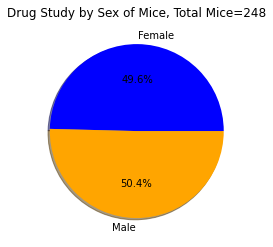

In [14]:
#Create Pie Chart by Mice Sex Total in Study using Matplotlib pyplot
labels = ["Female","Male"]
colors = ["blue","orange"]
piechart = plt.pie(bysex, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True)
plt.title("Drug Study by Sex of Mice, Total Mice=248")
plt.show()

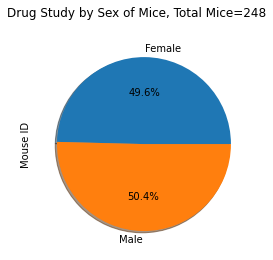

In [15]:
#Create Pie Chart by Mice Sex Total in Study using using DataFrame.plot
bysex.plot(kind='pie', title='Drug Study by Sex of Mice, Total Mice=248',subplots=True, shadow=True,figsize=(8,4), autopct='%1.1f%%')
plt.show()

In [16]:
#Final Tumor Volume for each
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
topdrugs=['Capomulin','Ceftamin','Infubinol','Ramicane']
tumorvol=[]
topfour = merged_df.loc[merged_df['Drug Regimen'].isin(['Capomulin','Ceftamin','Infubinol','Ramicane'])]
topfour = topfour.drop(columns=['Sex','Age_months','Weight (g)','Metastatic Sites'])
topfour


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,0,45.000000
1,k403,Ramicane,5,38.825898
2,k403,Ramicane,10,35.014271
3,k403,Ramicane,15,34.223992
4,k403,Ramicane,20,32.997729
...,...,...,...,...
1868,z581,Infubinol,25,54.316407
1869,z581,Infubinol,30,56.286750
1870,z581,Infubinol,35,58.628399
1871,z581,Infubinol,40,60.053740


In [17]:
#Sort by Maximum Timepoint, dropping all Mouse ID duplicates.  Keep Tumor Volume for Quartile and IQR calculations.
topfourfinal_df = topfour.sort_values('Timepoint', ascending=False).drop_duplicates('Mouse ID').sort_index()
topfourfinal_df
#write out data to review
#topfourfinal_df.to_csv('C:/Users/rjp54/output.csv', sep='\t', encoding='utf-8')

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
9,k403,Ramicane,45,22.050126
19,s185,Capomulin,45,23.343598
29,x401,Capomulin,45,28.484033
39,m601,Capomulin,45,28.430964
49,g791,Ramicane,45,29.128472
...,...,...,...,...
1797,x822,Ceftamin,45,61.386660
1813,y163,Infubinol,45,67.685569
1845,y769,Ceftamin,45,68.594745
1855,y865,Ceftamin,45,64.729837


In [42]:
#Alternative IQR and outliers using For loop
cap_final_df = topfourfinal_df.sort_values('Drug Regimen').sort_index()
treatment_list = "Capomulin","Ramicane","Infubinol","Ceftamin"
tumor_vol_list = []
for drug in treatment_list:
    final_tumor_vol = cap_final_df.loc[cap_final_df["Drug Regimen"]==drug,'Tumor Volume (mm3)']
    #adding this to our list of tumor volume values
    tumor_vol_list.append(final_tumor_vol)
    #Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    median = quartiles[0.50]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s the lower quartile for Tumor Volume (mm3) is: {lowerq}")
    print(f"{drug}'s the median Tumor Volume (mm3) is: {median}")
    print(f"{drug}'s the upper quartile for Tumor Volume (mm3) is: {upperq}")
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's the lower quartile for Tumor Volume (mm3) is: 32.37735684
Capomulin's the median Tumor Volume (mm3) is: 38.125164399999996
Capomulin's the upper quartile for Tumor Volume (mm3) is: 40.1592203
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's the lower quartile for Tumor Volume (mm3) is: 31.56046955
Ramicane's the median Tumor Volume (mm3) is: 36.56165229
Ramicane's the upper quartile for Tumor Volume (mm3) is: 40.65900627
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's the lower quartile for Tumor Volume (mm3) is: 54.04860769
Infubinol's the median Tumor Volume (mm3) is: 60.16518046
Infubinol's the upper quartile for Tumor Volume (mm3) is: 65.52574285
Infubinol's potential outliers: 669    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's the lower quartile for Tumor Volume (mm3) is: 48.72207785
Ceftamin's the median Tumor Volume (mm3) is: 59.85195552
Ceftamin's the upp

In [62]:
#Create dataframe for Capomulin
cap_final_df=topfourfinal_df[topfourfinal_df['Drug Regimen'].isin(['Capomulin'])]
cap_final_df.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
19,s185,Capomulin,45,23.343598
29,x401,Capomulin,45,28.484033
39,m601,Capomulin,45,28.430964
64,f966,Capomulin,20,30.485985
104,u364,Capomulin,45,31.023923


In [19]:
#Calculate IQRs and determine Outliers for Capomulin
quartiles = cap_final_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile for Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile for Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range for Tumor Volume (mm3) is: {iqr}")
print(f"The median Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile for Tumor Volume (mm3) is: 32.37735684
The upper quartile for Tumor Volume (mm3) is: 40.1592203
The interquartile range for Tumor Volume (mm3) is: 7.781863460000004
The median Tumor Volume (mm3) is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [20]:
#Create dataframe for Ceftamin
ceft_final_df=topfourfinal_df[topfourfinal_df['Drug Regimen'].isin(['Ceftamin'])]
ceft_final_df.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
493,a275,Ceftamin,45,62.999356
594,b447,Ceftamin,0,45.000000
600,b487,Ceftamin,25,56.057749
617,b759,Ceftamin,30,55.742829
840,f436,Ceftamin,15,48.722078


In [21]:
#Calculate IQRs and determine Outliers for Ceftamin
quartiles = ceft_final_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile for Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile for Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range for Tumor Volume (mm3) is: {iqr}")
print(f"The median Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile for Tumor Volume (mm3) is: 48.72207785
The upper quartile for Tumor Volume (mm3) is: 64.29983003
The interquartile range for Tumor Volume (mm3) is: 15.577752179999997
The median Tumor Volume (mm3) is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [22]:
#Create dataframe for Infubinol
inf_final_df=topfourfinal_df[topfourfinal_df['Drug Regimen'].isin(['Infubinol'])]
inf_final_df.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
463,a203,Infubinol,45,67.973419
473,a251,Infubinol,45,65.525743
530,a577,Infubinol,30,57.031862
540,a685,Infubinol,45,66.083066
637,c139,Infubinol,45,72.226731


In [23]:
#Calculate IQRs and determine Outliers for Infubinol
quartiles = inf_final_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile for Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile for Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range for Tumor Volume (mm3) is: {iqr}")
print(f"The median Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile for Tumor Volume (mm3) is: 54.04860769
The upper quartile for Tumor Volume (mm3) is: 65.52574285
The interquartile range for Tumor Volume (mm3) is: 11.477135160000003
The median Tumor Volume (mm3) is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [24]:
#Create dataframe for Ramicane
ram_final_df=topfourfinal_df[topfourfinal_df['Drug Regimen'].isin(['Ramicane'])]
ram_final_df.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
9,k403,Ramicane,45,22.050126
49,g791,Ramicane,45,29.128472
59,s508,Ramicane,45,30.276232
74,m546,Ramicane,45,30.564625
84,z578,Ramicane,45,30.638696


In [25]:
#Calculate IQRs and determine Outliers for Ramicane
quartiles = ram_final_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile for Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile for Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range for Tumor Volume (mm3) is: {iqr}")
print(f"The median Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile for Tumor Volume (mm3) is: 31.56046955
The upper quartile for Tumor Volume (mm3) is: 40.65900627
The interquartile range for Tumor Volume (mm3) is: 9.098536719999998
The median Tumor Volume (mm3) is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


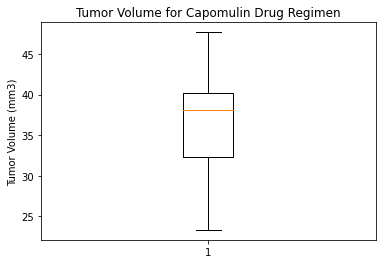

In [26]:
#Create Box and Whisker Plots for Capomulin, Ramicane, Infubinol, and Ceftamin
capvol = cap_final_df['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Capomulin Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(capvol)
plt.show()

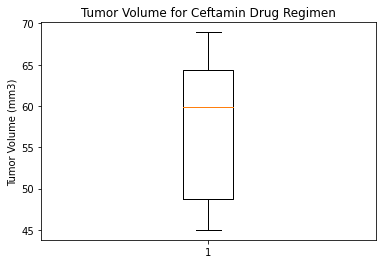

In [27]:
#Create Box and Whisker Plots for Capomulin, Ramicane, Infubinol, and Ceftamin
ceftvol = ceft_final_df['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Ceftamin Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(ceftvol)
plt.show()

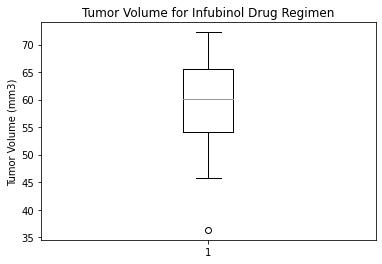

In [28]:
#Create Box and Whisker Plots for Capomulin, Ramicane, Infubinol, and Ceftamin
infvol = inf_final_df['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Infubinol Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(infvol)
plt.show()

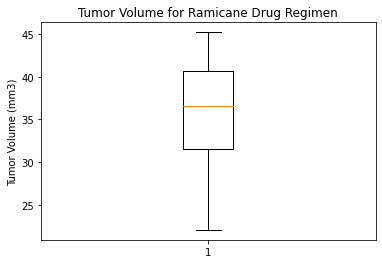

In [29]:
#Create Box and Whisker Plots for Capomulin, Ramicane, Infubinol, and Ceftamin
ramvol = ram_final_df['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Ramicane Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(ramvol)
plt.show()

In [30]:
#Select Mouse treated with Capomulin, generate a line plot of tumor volume vs. time point
#Selecting Mouse: b742
mousereview_df = merged_df[merged_df['Mouse ID'].isin(['b742'])]
mousereview_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
290,b742,Capomulin,Male,7,21,0,45.000000,0
291,b742,Capomulin,Male,7,21,5,41.534097,0
292,b742,Capomulin,Male,7,21,10,41.999228,0
293,b742,Capomulin,Male,7,21,15,39.524843,0
294,b742,Capomulin,Male,7,21,20,37.950355,0
295,b742,Capomulin,Male,7,21,25,38.617684,0
296,b742,Capomulin,Male,7,21,30,39.167949,0
297,b742,Capomulin,Male,7,21,35,39.847576,0
298,b742,Capomulin,Male,7,21,40,38.255627,0
299,b742,Capomulin,Male,7,21,45,38.939633,0


In [31]:
#Condense Columns into new df
mousesample = mousereview_df.loc[:,["Timepoint", "Tumor Volume (mm3)"]]
mousesample


,Timepoint,Tumor Volume (mm3)
290,0,45.000000
291,5,41.534097
292,10,41.999228
293,15,39.524843
294,20,37.950355
295,25,38.617684
296,30,39.167949
297,35,39.847576
298,40,38.255627
299,45,38.939633


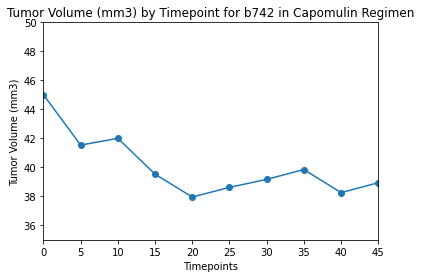

In [32]:
#Plot line chart for b742
x_label = mousesample["Timepoint"]
y_label = mousesample["Tumor Volume (mm3)"]
plt.plot(x_label,y_label, marker='o')
plt.xlim(0,45)
plt.ylim(35,50)
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume (mm3) by Timepoint for b742 in Capomulin Regimen")
plt.show()


In [34]:
#Create Dataframe for Scatter Plot of Capomulin Treatment Regimen
#Need to Calculate Average Tumor Volume from Tumor Volumes
capscatter_df = merged_df[merged_df['Drug Regimen'].isin(['Capomulin'])]
#write out data to review
#capscatter_df.to_csv('C:/Users/rjp54/capscatter.csv', sep='\t', encoding='utf-8')

In [35]:
#Eliminate Columns to those needed
capscatter_df = capscatter_df.loc[:, ["Mouse ID", "Weight (g)","Tumor Volume (mm3)"]]

In [36]:
#Groupby Mouse ID and Weight and Calculate Average Tumor Volume
finalcapscatter_df = pd.DataFrame(capscatter_df.groupby(["Mouse ID","Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
finalcapscatter_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [37]:
#Change Name of Tumor Column to start Scatterplot
finalcapscatter_df = finalcapscatter_df.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume"})
#write out data to review
#finalcapscatter_df.to_csv('C:/Users/rjp54/finalcapscatter.csv', sep='\t', encoding='utf-8')
finalcapscatter_df.head()

,Mouse ID,Weight (g),Average Tumor Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


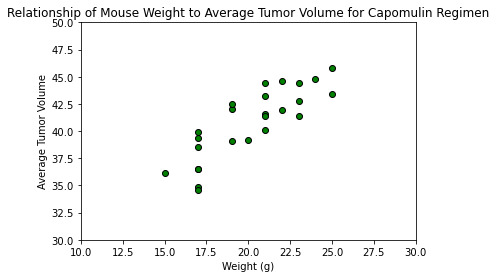

In [38]:
#Create Scatter Graph
weight = finalcapscatter_df["Weight (g)"]
avgtumor = finalcapscatter_df["Average Tumor Volume"]
plt.scatter(weight,avgtumor, facecolors="green", edgecolors="black")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.xlim(10,30)
plt.ylim(30,50)
plt.title('Relationship of Mouse Weight to Average Tumor Volume for Capomulin Regimen')
plt.show()

In [53]:
#Calculate Correlation Coefficent between Mouse Weight and Average Tumor Volume for Capomulin
weightcorr = finalcapscatter_df.iloc[:,1]
avgtumorvolcorr = finalcapscatter_df.iloc[:,2]
correlation = st.pearsonr(weightcorr, avgtumorvolcorr)
print(f"The correlation between Weight and Average Tumor Volume is {round(correlation[0],4)}")



The correlation between Weight and Average Tumor Volume is 0.8419


The r-squared is: 0.7088568047708717


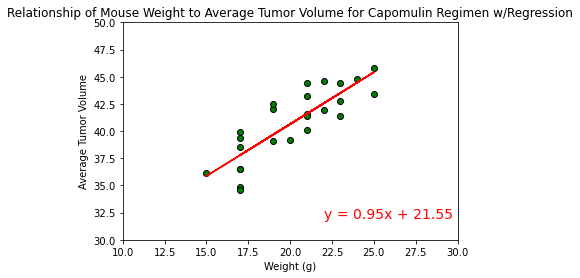

In [66]:
#Linear Regression Model, create same scatterplot and add regression line, formula, and R2
#Need linregress library
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, avgtumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,avgtumor,facecolors="green", edgecolors="black")
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(22,32),fontsize=14,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.xlim(10,30)
plt.ylim(30,50)
plt.title('Relationship of Mouse Weight to Average Tumor Volume for Capomulin Regimen w/Regression')
print(f"The r-squared is: {rvalue**2}")
plt.show()